In [1]:
import numpy as np
from scipy.optimize import curve_fit

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Time by Rate $(200<z<300)$

### Extracting

In [3]:
def extract(filepath):
    with open(filepath) as f:
        lines = f.readlines()
    xs = []
    ys = []
    for i in range(len(lines)):
        line = lines[i]
        chunk = line.split(' ')
        if chunk[0] == 'Testing':
            x = float(chunk[4])
            sumy = 0
            j = i + 1
            while j < len(lines):
                subline = lines[j]
                subchunk = subline.split(' ')
                if subchunk[0] == 'Interpolation':
                    sumy += float(subchunk[3])
                    j += 1
                else:
                    break
            y = sumy / (j - i - 1)
            xs.append(x)
            ys.append(y)
    return np.array(xs), np.array(ys)

In [4]:
rates_kraken, rates_time_kraken = extract('rates_time_kraken.txt')

In [5]:
rates_lakota, rates_time_lakota = extract('rates_time_lakota.txt')

In [6]:
rates_chiron, rates_time_chiron = extract('rates_time_chiron.txt')

In [7]:
rates_cluster, rates_time_cluster = extract('rates_time_cluster.txt')

### Plotting

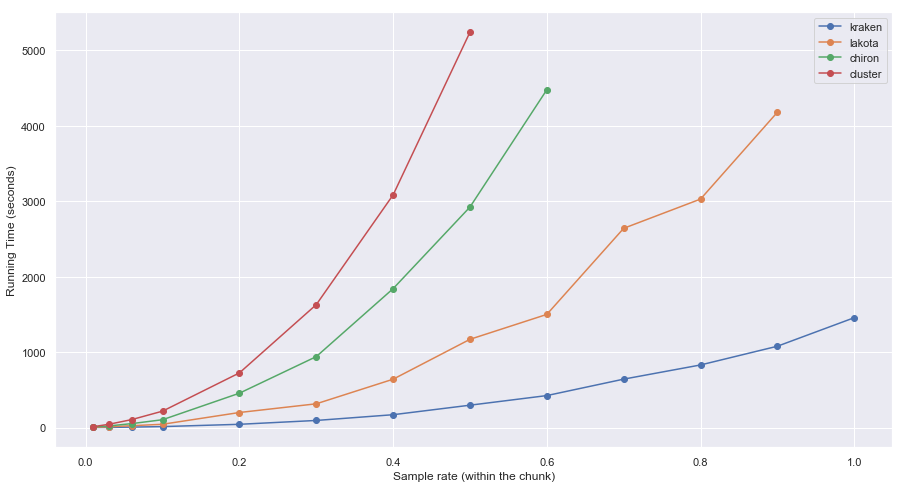

In [8]:
plt.figure(figsize=(15,8))
plt.plot(rates_kraken, rates_time_kraken, marker='o', label='kraken')
plt.plot(rates_lakota, rates_time_lakota, marker='o', label='lakota')
plt.plot(rates_chiron, rates_time_chiron, marker='o', label='chiron')
plt.plot(rates_cluster, rates_time_cluster, marker='o', label='cluster')

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Running Time (seconds)')
plt.legend()
plt.show()

### Quadratic Curve Fitting

In [10]:
def quad_func(x, a, b, c):
    return a * x**2 + b * x + c

In [11]:
def fitting_rates(x, y, func):
    popt, pcov = curve_fit(func, x, y, p0=(1, 1e-5, 1))
    fitx = np.arange(0, 1, 0.01)
    fity = func(fitx, *popt)
    return fitx, fity

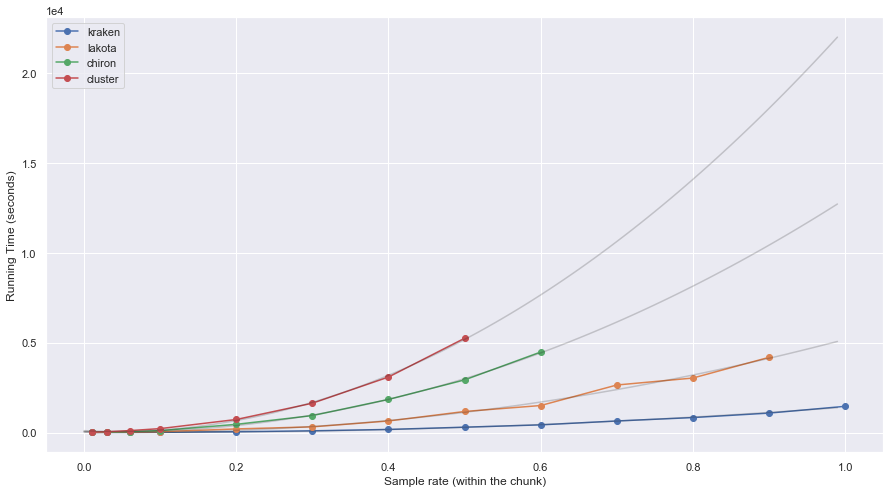

In [64]:
plt.figure(figsize=(15,8))
plt.plot(rates_kraken, rates_time_kraken, marker='o', label='kraken')
plt.plot(*fitting_rates(rates_kraken, rates_time_kraken, quad_func), c='k', alpha=0.2)
plt.plot(rates_lakota, rates_time_lakota, marker='o', label='lakota')
plt.plot(*fitting_rates(rates_lakota, rates_time_lakota, quad_func), c='k', alpha=0.2)
plt.plot(rates_chiron, rates_time_chiron, marker='o', label='chiron')
plt.plot(*fitting_rates(rates_chiron, rates_time_chiron, quad_func), c='k', alpha=0.2)
plt.plot(rates_cluster, rates_time_cluster, marker='o', label='cluster')
plt.plot(*fitting_rates(rates_cluster, rates_time_cluster, quad_func), c='k', alpha=0.2)

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Running Time (seconds)')
plt.legend()
plt.show()

## Time by Chunk $(rate=1)$

### Extracting

In [65]:
def extract2(filepath):
    with open(filepath) as f:
        lines = f.readlines()
    xs = []
    ys = []
    for i in range(len(lines)):
        line = lines[i]
        chunk = line.split(' ')
        if chunk[0] == 'Testing':
            x = float(chunk[4]) / 2433528
            sumy = 0
            j = i + 1
            while j < len(lines):
                subline = lines[j]
                subchunk = subline.split(' ')
                if subchunk[0] == 'Interpolation':
                    sumy += float(subchunk[3])
                    j += 1
                else:
                    break
            y = sumy / (j - i - 1)
            xs.append(x)
            ys.append(y)
    return np.array(xs), np.array(ys) / 3600

In [66]:
sizes_kraken1, sizes_time_kraken1 = extract2('sizes_time_kraken.txt')

In [67]:
sizes_kraken2, sizes_time_kraken2 = extract2('sizes_time_kraken2.txt')

In [91]:
sizes_kraken = np.concatenate((sizes_kraken1, sizes_kraken2))
sizes_kraken

array([4.10926030e-04, 1.23277809e-03, 2.46555618e-03, 4.10926030e-03,
       1.23277809e-02, 2.46555618e-02, 4.10926030e-02, 8.21852060e-02,
       1.23277809e-01, 1.64370412e-01, 2.05463015e-01, 2.46555618e-01,
       2.87648221e-01, 3.28740824e-01, 3.69833427e-01, 4.10926030e-01,
       5.00000000e-01])

In [92]:
sizes_time_kraken = np.concatenate((sizes_time_kraken1, sizes_time_kraken2))
sizes_time_kraken

array([1.51111111e-04, 1.90000000e-04, 3.57500000e-04, 6.56111111e-04,
       5.80027778e-03, 2.58047222e-02, 7.48416667e-02, 3.43168056e-01,
       8.36695833e-01, 1.62554306e+00, 2.54385417e+00, 3.65469861e+00,
       4.94490278e+00, 7.02033056e+00, 1.41443056e+01, 2.59130167e+01,
       4.41306167e+01])

In [93]:
sizes_time_kraken[-2] -= 4

In [94]:
sizes_lakota, sizes_time_lakota = extract2('sizes_time_lakota.txt')

In [95]:
sizes_chiron, sizes_time_chiron = extract2('sizes_time_chiron.txt')

In [96]:
sizes_cluster, sizes_time_cluster = extract2('sizes_time_cluster.txt')

### Plotting

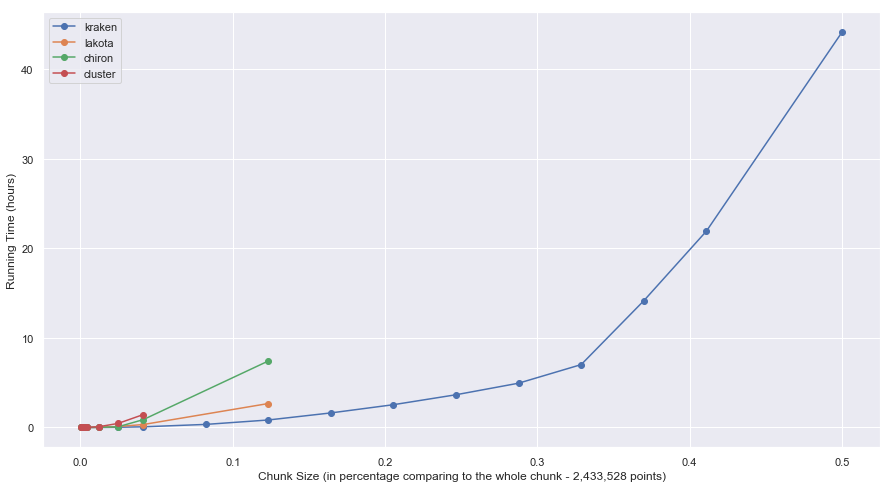

In [97]:
plt.figure(figsize=(15,8))
plt.plot(sizes_kraken, sizes_time_kraken, marker='o', label='kraken')
plt.plot(sizes_lakota, sizes_time_lakota, marker='o', label='lakota')
plt.plot(sizes_chiron, sizes_time_chiron, marker='o', label='chiron')
plt.plot(sizes_cluster, sizes_time_cluster, marker='o', label='cluster')

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Chunk Size (in percentage comparing to the whole chunk - 2,433,528 points)')
plt.ylabel('Running Time (hours)')
plt.legend()
plt.show()

### Curve Fitting

In [98]:
def quad_func(x, a, b, c):
    return a * x**2 + b * x + c

In [99]:
def fitting_sizes(x, y, func):
    popt, pcov = curve_fit(func, x, y, p0=(1, 1e-5, 1))
    fitx = np.arange(0, 1, 0.001)
    fity = func(fitx, *popt)
    return fitx, fity

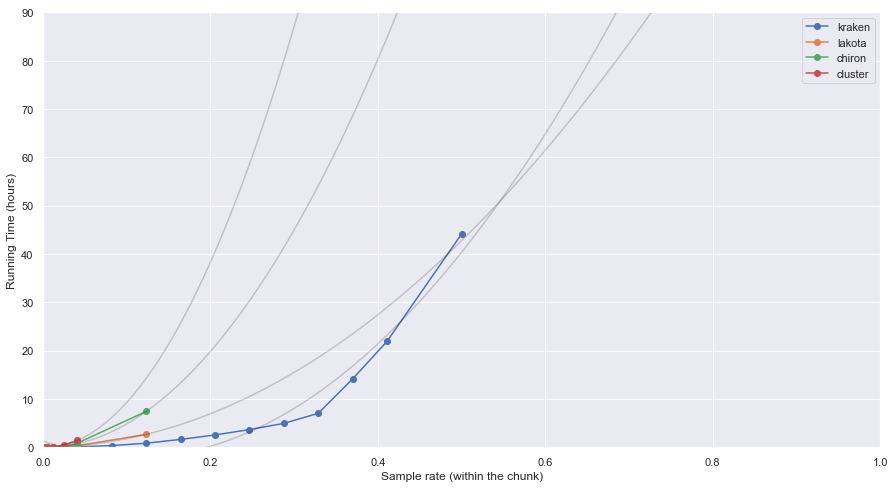

In [101]:
plt.figure(figsize=(15,8))
plt.plot(sizes_kraken, sizes_time_kraken, marker='o', label='kraken')
plt.plot(*fitting_sizes(sizes_kraken, sizes_time_kraken, quad_func), c='k', alpha=0.2)
plt.plot(sizes_lakota, sizes_time_lakota, marker='o', label='lakota')
plt.plot(*fitting_sizes(sizes_lakota, sizes_time_lakota, quad_func), c='k', alpha=0.2)
plt.plot(sizes_chiron, sizes_time_chiron, marker='o', label='chiron')
plt.plot(*fitting_sizes(sizes_chiron, sizes_time_chiron, quad_func), c='k', alpha=0.2)
plt.plot(sizes_cluster, sizes_time_cluster, marker='o', label='cluster')
plt.plot(*fitting_sizes(sizes_cluster, sizes_time_cluster, quad_func), c='k', alpha=0.2)

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Sample rate (within the chunk)')
plt.ylabel('Running Time (hours)')
plt.xlim([0,1])
plt.ylim([0,90])
plt.legend()
plt.show()

## Prediction for Kraken

In [126]:
def predict(x, y, n):
    popt, pcov = curve_fit(quad_func, x[:8], y[:8], p0=(1, 1e-5, 1))
    return quad_func(n, *popt)

In [127]:
predict(sizes_kraken, sizes_time_kraken, 0.01)

0.002298709033511265

In [128]:
predict(sizes_kraken, sizes_time_kraken, 0.1) * 3600

1860.9456003734233

In [129]:
predict(sizes_kraken, sizes_time_kraken, 0.2)

2.1565928193113977

In [111]:
predict(sizes_kraken, sizes_time_kraken, 0.5) / 24

1.68129364777886

In [110]:
predict(sizes_kraken, sizes_time_kraken, 1) / 24

9.10035627121494